In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
# from foucluster import * 
import seaborn as sns
import matplotlib.pyplot as plt

/home/cperales/pruebas/Fourier-classifying-songs/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cperales/pruebas/Fourier-classifying-songs/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
cluster_df = pd.read_csv(os.path.join('../cluster/l2_norm_KMeans.csv'),
                              sep=';')
cluster_df = cluster_df.set_index('Songs')
print(cluster_df)

                                                    1 - Bach - Air.mp3  \
Songs                                                                    
1 - Bach - Air.mp3                                            0.000000   
1 - Beethoven - Claro de Luna.mp3                             0.625572   
1 - Beethoven - Fur Elise.mp3                                 0.662610   
1 - Mozart - Lacrimosa.mp3                                    0.521896   
1 - Mozart - Serenata Nocturna.mp3                            0.506968   
2 - Creedence Clearwater Revival  Proud Mary.mp3              0.543113   
2 - Dreams - Fleetwood Mac.mp3                                0.556741   
2 - Have You Ever Seen The Rain  - Creedence Cl...            0.535620   
2 - Hey Jude - The Beatles.mp3                                0.547863   
2 - House Of The Rising Sun - The Animals.mp3                 0.554426   
2 - Me & Bobby McGee - Janis Joplin.mp3                       0.517953   
2 - Somebody to love - Jefferson airpl

In [3]:
dist_df = cluster_df.drop(columns=['Cluster'])

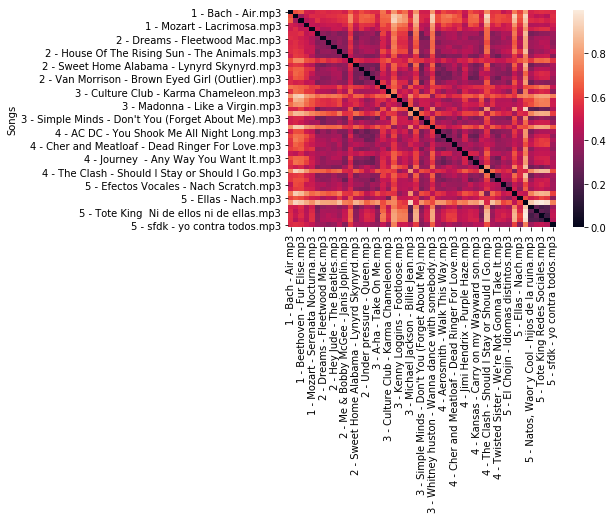

In [4]:
fig, ax = plt.subplots()
sns.heatmap(dist_df)
#fig.subplots_adjust(left=0.35,
#                    bottom=0.35,
#                    right=1.0,
#                    top=0.95)
#plt.axis('off')
plt.show()
fig.savefig('../image/2_3_l2_norm.png')

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dist_df)

In [6]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'],
                          index=dist_df.index)

[0 1 2 3 4 5 6]


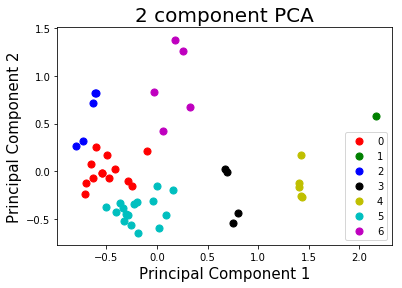

In [7]:
fig, ax = plt.subplots()
targets = np.unique(cluster_df['Cluster'].values)
colors = ['r', 'g', 'b', 'k', 'y', 'c', 'm']
print(targets)
for target, color in zip(targets, colors):
    indicesToKeep = cluster_df['Cluster'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

#songs = principalDf.index
#for song in principalDf.index:
#    x = principalDf.loc[song, 'principal component 1']
#    y = principalDf.loc[song, 'principal component 2']
#    if np.random.rand() >= 0.87:
#        ax.annotate('%s' % song, xy=(x,y), xytext=(x+0.1, y), textcoords='data')

ax.legend(targets)
#ax.grid()
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#legend = ax.legend()
#legend.remove()
fig.savefig('../image/pca_2_3_l2_norm.png')

In [8]:
print(cluster_df.sort_values('Cluster')['Cluster'])

Songs
3 - Simple Minds - Don't You (Forget About Me).mp3                     0
4 - Twisted Sister - I Wanna Rock.mp3                                  0
4 - Survivor - Eye of the Tiger.mp3                                    0
4 - Jimi Hendrix - Purple Haze.mp3                                     0
3 - Wham - Wake Me Up Before You Go-Go.mp3                             0
3 - A-ha - Take On Me.mp3                                              0
2 - Sweet Home Alabama - Lynyrd Skynyrd.mp3                            0
2 - House Of The Rising Sun - The Animals.mp3                          0
5 - sfdk - yo contra todos.mp3                                         0
2 - Have You Ever Seen The Rain  - Creedence Clearwater Revival.mp3    0
2 - Hey Jude - The Beatles.mp3                                         0
2 - Dreams - Fleetwood Mac.mp3                                         0
2 - Creedence Clearwater Revival  Proud Mary.mp3                       0
5 - NACH - Manifiesto.mp3                    

In [9]:
def party_list(cluster_df, song=None):
    try:
        print(cluster_df.sort_values(song)[song])
    except Exception as e:
        song = cluster_df.index[0]
        print(cluster_df.sort_values(song)[song])

In [10]:
party_list(cluster_df=cluster_df, song='3 - Wham - Wake Me Up Before You Go-Go.mp3')

Songs
3 - Wham - Wake Me Up Before You Go-Go.mp3                             0.000000
2 - Dreams - Fleetwood Mac.mp3                                         0.307898
2 - Me & Bobby McGee - Janis Joplin.mp3                                0.334457
4 - Cher and Meatloaf - Dead Ringer For Love.mp3                       0.341884
2 - Hey Jude - The Beatles.mp3                                         0.347463
2 - Van Morrison - Brown Eyed Girl (Outlier).mp3                       0.353054
2 - Have You Ever Seen The Rain  - Creedence Clearwater Revival.mp3    0.355223
4 - Jimi Hendrix - Purple Haze.mp3                                     0.369139
4 - Twisted Sister - We're Not Gonna Take It.mp3                       0.375954
3 - Simple Minds - Don't You (Forget About Me).mp3                     0.380360
4 - Survivor - Eye of the Tiger.mp3                                    0.380830
5 - Efectos Vocales - Nach Scratch.mp3                                 0.387852
5 - El Chojin - Idiomas distintos.